Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Importing the data

In [8]:
iris = pd.read_csv("final.csv")
x = iris.iloc[:, [1,5]].values
# target = iris.iloc[:,2].values
scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)


Viewing the Data

In [9]:
x

array([[  1.,  22.],
       [  2.,  38.],
       [  3.,  26.],
       ...,
       [889.,  27.],
       [890.,  26.],
       [891.,  32.]])

Viewing the target

In [10]:
arr_x=[]
arr_y=[]
for i in range(len(x)):
    arr_x.append(x[i,0])
    arr_y.append(x[i,1])

Ploting the data according to target 

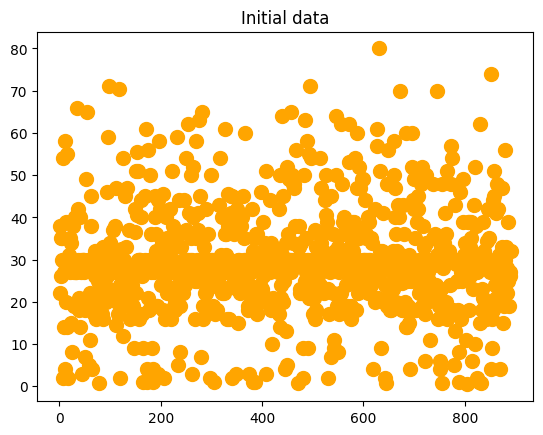

In [11]:
plt.scatter(arr_x,arr_y, s = 100, c = 'orange')
plt.title('Initial data')
plt.show()

finding the exact value epsilon

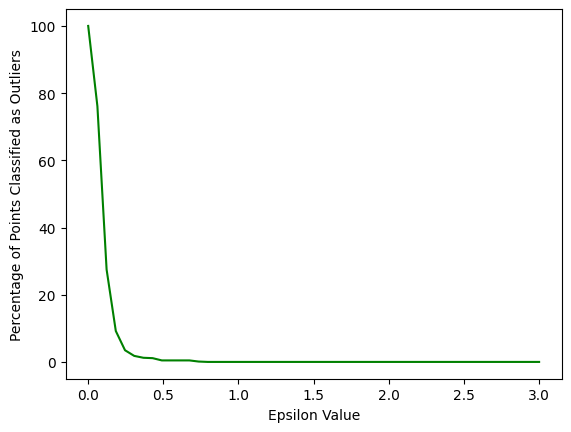

In [12]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=4)
    dbscan.fit(scaled_df)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.show()


Applying  DBSCAN

In [13]:
m = DBSCAN(eps=0.3, min_samples=7)
ydbscan=m.fit_predict(scaled_df)

Viewing the the cluster formation

In [14]:
ydbscan

array([ 0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  1, -1,  0,  0,  0, -1,  1,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  2,  0, -1,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,
       -1,  1,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  0

Ploting the clusturing result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


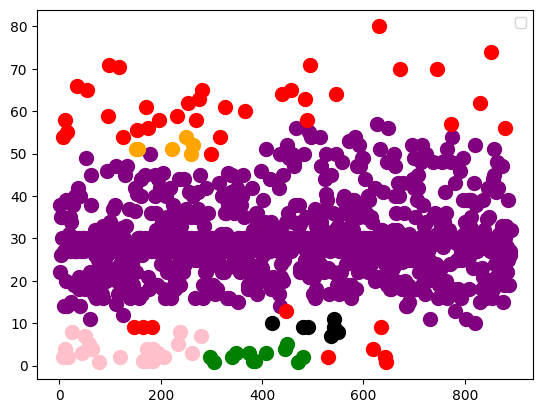

In [20]:
# fig, axes = plt.subplots(1, 2, figsize=(14,6))
plt.scatter(x[ydbscan == 0, 0], x[ydbscan == 0, 1], s = 100, c = 'purple')
plt.scatter(x[ydbscan == -1, 0], x[ydbscan == -1, 1], s = 100, c = 'red')
plt.scatter(x[ydbscan == 1, 0], x[ydbscan == 1, 1], s = 100, c = 'pink')
plt.scatter(x[ydbscan == 2, 0], x[ydbscan == 2, 1], s = 100, c = 'orange')
plt.scatter(x[ydbscan == 3, 0], x[ydbscan == 3, 1], s = 100, c = 'green')
plt.scatter(x[ydbscan == 4, 0], x[ydbscan == 4, 1], s = 100, c = 'black')
plt.legend()
plt.show()

In [22]:
print('noisy points are : ',x[ydbscan == -1, 0])

noisy points are :  [  7.  12.  16.  34.  55.  95.  97. 117. 125. 148. 153. 166. 171. 175.
 183. 196. 233. 253. 269. 276. 281. 300. 318. 327. 367. 439. 447. 457.
 484. 488. 494. 531. 546. 619. 631. 635. 643. 645. 673. 746. 773. 830.
 852. 880.]
